In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator

In [34]:
archivo=open("50mm.csv","r")
archivo.readline()

tiempo=[]
posicion=[]
for linea in archivo:
    tiempo.append(float(linea.split(";")[0]))
    if linea != "\n":
        posicion.append(float(linea.split(";")[1]))

In [93]:
tiempoFinal=[]
posicionFinal=[]
for i in range(len(tiempo)):
    if tiempo[i] >= 27.766666666666666:
        tiempoFinal.append(tiempo[i])
        posicionFinal.append(posicion[i])
# Se busca la amplitud ideal de los datos
Amax=max(posicionFinal)
Amin=min(posicionFinal)
print(Amax,"\n",Amin)

tiempoFinal=np.array(tiempoFinal)
posicionFinal=np.array(posicionFinal)

diff=abs((Amin+Amax)/2)
print(diff)

49.59 
 -68.75
9.579999999999998


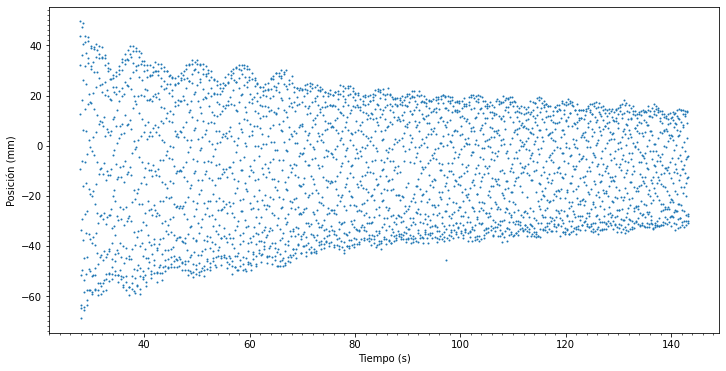

In [90]:
fig,ax=plt.subplots(1,1,figsize=(12,6))

ax.scatter(tiempoFinal,posicionFinal,s=1)
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Posición (mm)")
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.show()

In [98]:
posicionFinal2=diff+posicionFinal


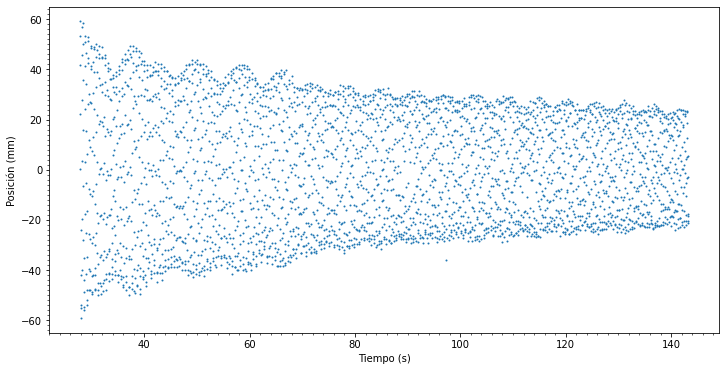

In [95]:
fig,ax=plt.subplots(1,1,figsize=(12,6))

ax.scatter(tiempoFinal,posicionFinal2,s=1)
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Posición (mm)")
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.show()

In [37]:
fourier=abs(np.fft.fft(posicionFinal,n=None,axis=-1,norm=None))
frecuencia=np.fft.fftfreq(len(tiempoFinal),tiempoFinal[1]-tiempoFinal[0])

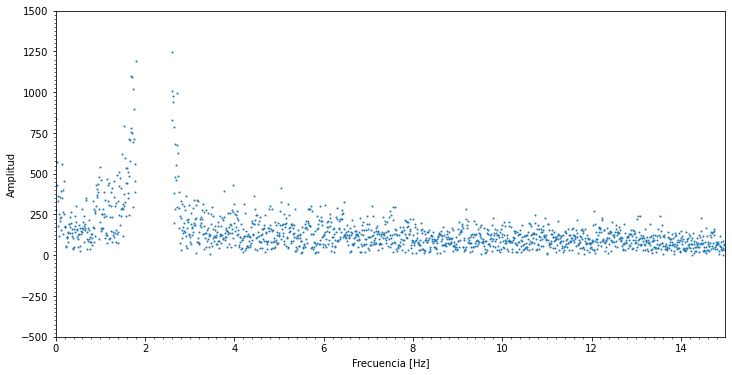

In [38]:
fig,ax=plt.subplots(1,1,figsize=(12,6))

ax.scatter(frecuencia,fourier,s=1)
ax.set_xlabel("Frecuencia [Hz]")
ax.set_ylabel("Amplitud")
ax.set_ylim(-500,1500)
ax.set_xlim(0,max(frecuencia))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.show()

In [39]:
frecuenciaMax=0
for i in range(len(fourier)):
    if frecuencia[i]>2.6:
        if fourier[i]==1246.7425312815833:
            frecuenciaMax=frecuencia[i]
            
periodo=1/frecuenciaMax
omega=(2*np.pi)/periodo
print(f"Periodo: {periodo}")
print(f"Omega: {omega}")

Periodo: 0.38267108167772323
Omega: 16.419284361997178


In [40]:
#Desde la gráfica del tiempo se identifican los peaks de amplitud.
peaks,_=find_peaks(posicionFinal)
listaPeak=[]
listaTiempo=[]
for i in peaks:
    listaPeak.append(posicionFinal[i])
    listaTiempo.append(tiempoFinal[i])
    
peaks2,_=find_peaks(listaPeak)
listaPeak2=[]
listaTiempo2=[]
for i in peaks2:
    listaPeak2.append(listaPeak[i])
    listaTiempo2.append(listaTiempo[i])
#print(listaPeak)

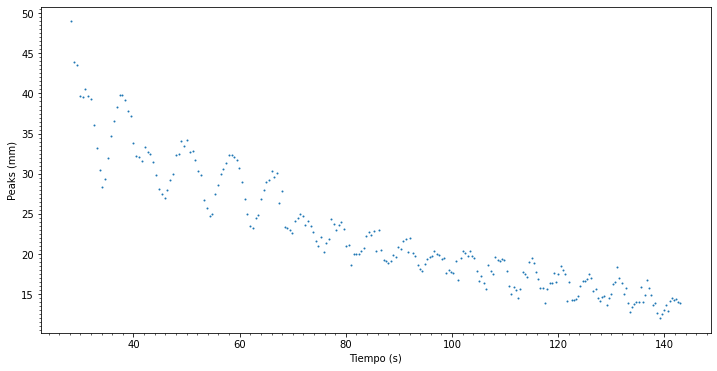

In [41]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.scatter(listaTiempo,listaPeak,s=1)
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Peaks (mm)")
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.show()

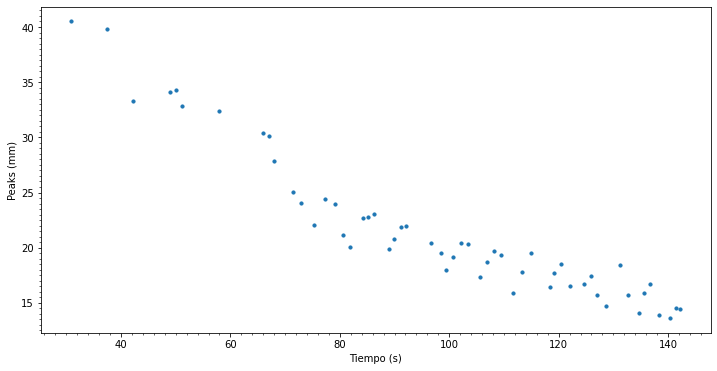

In [42]:
fig,ax=plt.subplots(1,1,figsize=(12,6))

ax.scatter(listaTiempo2,listaPeak2,s=10)
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Peaks (mm)")#
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.show()

C:\Users\Usach\AppData\Local\Temp/ipykernel_10032/816664408.py:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\Usach\AppData\Local\Temp/ipykernel_10032/816664408.py:3: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


Parámetros ajustados: [5.31101919e+01 9.66813810e-03]


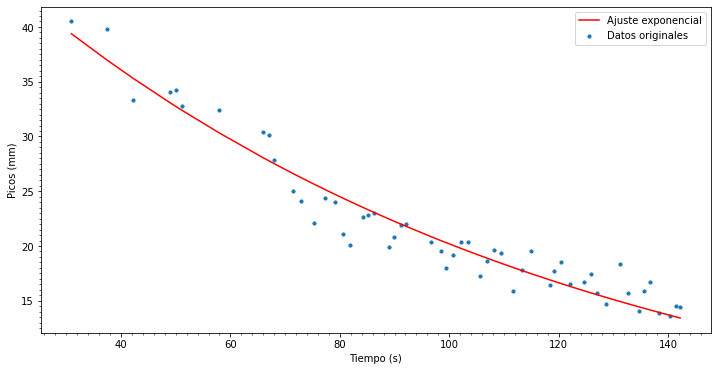

Coeficiente de amortiguamiento (gamma): 0.009668138098536335


In [43]:
# Definir la función exponencial negativa
def exponencialNegativa(x, a, b):
    return a * np.exp(-b * x)

listaPeak2 = np.array(listaPeak2)
listaTiempo2 = np.array(listaTiempo2)

# Proveer valores iniciales (esto es crucial si curve_fit no converge)
# a: amplitud inicial (puedes obtenerlo como el primer valor de listaPeak)
# b: tasa de decaimiento (inicialmente 0.1 puede ser un buen punto de partida)
valor_inicial_a = listaPeak2[0]
valor_inicial_b = 0.1
popt, pcov = curve_fit(exponencialNegativa, listaTiempo2, listaPeak2, p0=[valor_inicial_a, valor_inicial_b])

# Ver los resultados del ajuste
print("Parámetros ajustados:", popt)  # popt contiene [a, b], donde b es el coeficiente de amortiguamiento

# Graficar el ajuste
y_fit = exponencialNegativa(listaTiempo2, *popt)
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(listaTiempo2, listaPeak2, s=10, label="Datos originales")
ax.plot(listaTiempo2, y_fit, color="red", label="Ajuste exponencial")
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Picos (mm)")
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.legend()
plt.show()

# Extraer el coeficiente de amortiguamiento
gamma = popt[1]
print(f"Coeficiente de amortiguamiento (gamma): {gamma}")


In [44]:
wPrima=np.sqrt((omega**2)-(gamma**2))
print(wPrima)

16.419281515560623


In [100]:
A=max(posicionFinal2)
print(A)
tiempoFinal=np.array(tiempoFinal)
A=np.array(A)
x_t=A*np.exp(-1*gamma*tiempoFinal)*np.cos(wPrima*tiempoFinal)

59.17


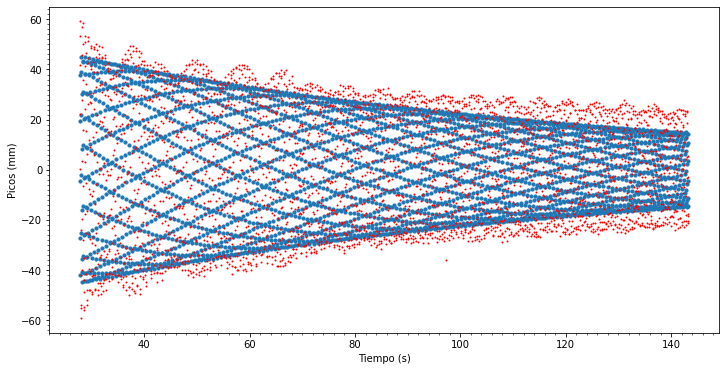

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(tiempoFinal, x_t, s=10)
ax.scatter(tiempoFinal,posicionFinal2,s=1,color="red")
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Picos (mm)")
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.show()